In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('DataAnalyst.csv', encoding = 'gb2312')
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


In [70]:
len(df.positionId.unique())

5031

In [71]:
df_duplicates = df.drop_duplicates(subset='positionId', keep='first')

In [72]:
def cut_word(word, method):
    position = word.find('-')
    length = len(word)
    if position != -1:
        bottomSalary = word[:(position - 1)]
        topSalary = word[(position + 1):(length - 1)]
    else:
        bottomSalary = word[:word.upper().find('K')]
        topSalary = bottomSalary
    if method == 'bottom':
        return bottomSalary
    else:
        return topSalary

In [73]:
df_duplicates['bottomSalary'] = df_duplicates.salary.apply(cut_word, method = 'bottom').astype('int')
df_duplicates['topSalary'] = df_duplicates.salary.apply(cut_word, method = 'top').astype('int')

/Users/doris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/doris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
df_duplicates.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear,bottomSalary,topSalary
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7,9
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,10,15
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,4,6
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,6,8
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2,3


In [77]:
df_duplicates['avgSalary'] = df_duplicates.apply(lambda x: (x.bottomSalary + x.topSalary)/2, axis = 1)

/Users/doris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
df_clean = df_duplicates[['city', 'companyShortName', 'companySize', 'education',
                         'positionName', 'positionLables',
                         'workYear', 'avgSalary']]

df_clean.head()

,city,companyShortName,companySize,education,positionName,positionLables,workYear,avgSalary
0,上海,1号店,2000人以上,硕士,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0
1,上海,点融网,500-2000人,本科,数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5
2,上海,SPD,50-150人,本科,数据分析师,"['分析师', '数据分析', '数据']",应届毕业生,5.0
3,上海,数云,150-500人,本科,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",应届毕业生,7.0
4,上海,银基富力,15-50人,本科,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2.5


In [109]:
df_clean.replace({'上海':'Shanghai',
                  '北京':'Beijing',
                  '本科':'Bachelor',
                  '硕士':'Master',
                  '博士': 'PhD',
                  '大专':'High School',
                  '不限':'Other'},
                 inplace = True)

/Users/doris/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3725: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


In [110]:
df_clean.education.value_counts()

Bachelor       3835
High School     615
Master          288
Other           287
PhD               6
Name: education, dtype: int64

In [82]:
df_clean.avgSalary.describe()

count    5031.000000
mean       17.111409
std         8.996242
min         1.500000
25%        11.500000
50%        15.000000
75%        22.500000
max        75.000000
Name: avgSalary, dtype: float64

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

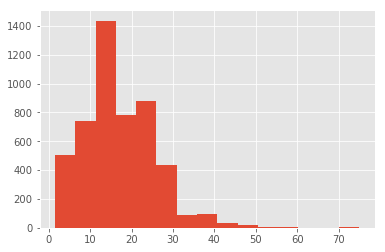

In [88]:
df_clean.avgSalary.hist(bins=15)

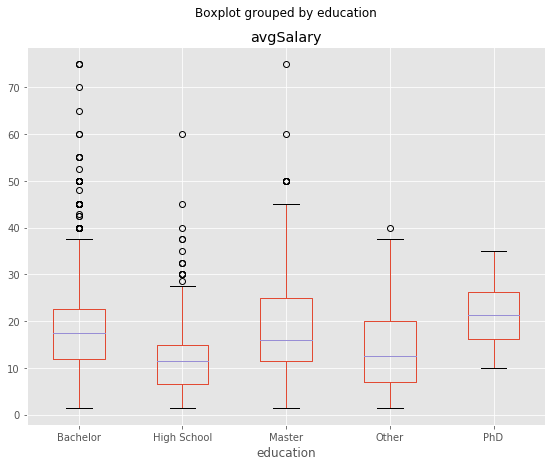

In [111]:
df_clean.boxplot(column='avgSalary', by='education', figsize=(9,7))

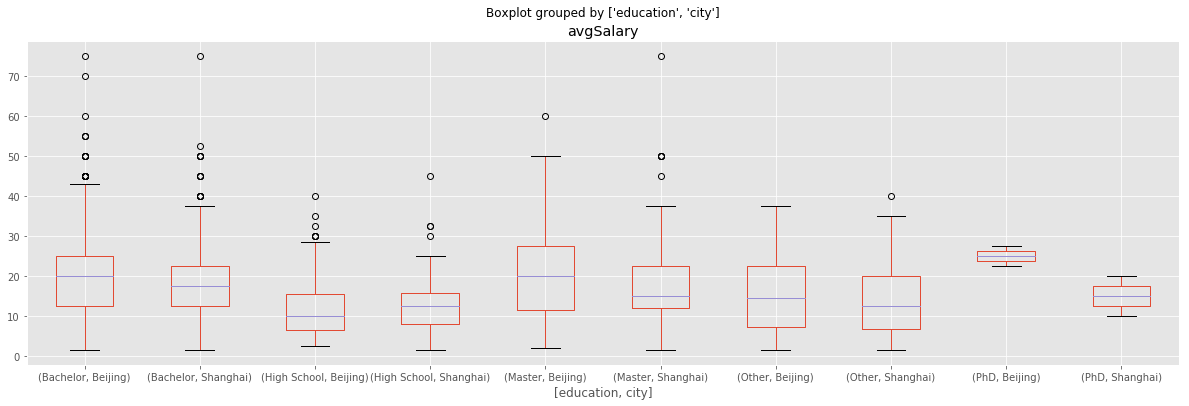

In [118]:
df_sh_bj = df_clean[df_clean.city.isin(['Beijing', 'Shanghai'])]
df_sh_bj.boxplot(column='avgSalary', by=['education', 'city'], figsize=(20,6))

In [120]:
df_clean.groupby('city').count()

,companyShortName,companySize,education,positionName,positionLables,workYear,avgSalary
city,,,,,,,
Beijing,2347,2347,2347,2347,2336,2347,2347
Shanghai,979,979,979,979,973,979,979
南京,83,83,83,83,82,83,83
厦门,30,30,30,30,30,30,30
天津,20,20,20,20,20,20,20
广州,335,335,335,335,333,335,335
成都,135,135,135,135,134,135,135
杭州,406,406,406,406,405,406,406
武汉,69,69,69,69,69,69,69


In [121]:
df_clean.groupby('city').mean()

,avgSalary
city,
Beijing,18.688539
Shanghai,17.280388
南京,10.951807
厦门,10.966667
天津,8.250000
广州,12.702985
成都,12.848148
杭州,16.455665
武汉,11.297101


In [125]:
df_clean.groupby(['city','education']).avgSalary.mean().unstack()

education,Bachelor,High School,Master,Other,PhD
city,,,,,
Beijing,19.435802,12.339474,19.759740,15.673387,25.0
Shanghai,17.987552,13.395455,19.180000,14.051471,15.0
南京,11.327869,9.272727,13.500000,7.000000,NaN
厦门,11.805556,6.785714,15.750000,12.500000,NaN
天津,9.300000,5.500000,NaN,3.500000,NaN
广州,14.170259,8.988095,14.571429,9.250000,NaN
成都,13.520202,11.000000,12.750000,10.562500,NaN
杭州,16.823432,12.327586,20.710526,18.269231,NaN
武汉,11.500000,11.214286,7.000000,10.950000,NaN


In [127]:
df_clean.groupby('companyShortName').avgSalary.agg(['count', 'mean']).sort_values(by='count',ascending=False)

,count,mean
companyShortName,,
美团点评,175,21.862857
滴滴出行,64,27.351562
百度,44,19.136364
网易,36,18.208333
今日头条,32,17.125000
腾讯,32,22.437500
京东,32,20.390625
百度外卖,31,17.774194
个推,31,14.516129


In [130]:
df_clean.groupby('companyShortName').avgSalary.agg(lambda x: max(x) - min(x))

companyShortName
12580               0.0
12家全国性股份制商业银行之一     0.0
1号店                22.0
2345.com            4.0
360                22.0
360企业安全             0.0
360金融               0.0
4399                0.0
4399游戏              5.0
500.com集团          15.0
51Talk 无忧英语        15.0
51信用卡管家            20.0
51爱趣淘               0.0
55海淘                0.0
58到家               30.0
58车                 0.0
AIRCOS              0.0
APUS Group         27.0
AbleCloud           2.5
Adhub               0.0
Alading Bank        0.0
Asia-analytics      0.0
Avazu Holding       0.0
BBD                63.5
BOE                 0.0
BTCC                3.0
BUGBANK             0.0
BW                  5.5
Baca                0.0
Base FX             0.0
                   ... 
驻云                  0.0
高伟达软件股份有限公司        17.5
高升控股               12.5
高德联讯                0.0
高校邦                 0.0
高阳通联                0.0
鬼吹灯3D               0.0
魔品科技                0.0
魔秀科技                2.5
魔窗                 10.0

In [134]:
def topN(df, n=5):
    counts = df.value_counts()
    return counts.sort_values(ascending = False)[:n]

In [136]:
df_clean.groupby('city').companyShortName.apply(topN)

city                     
Beijing   美团点评               156
          滴滴出行                60
          百度                  39
          今日头条                32
          百度外卖                31
Shanghai  饿了么                 23
          美团点评                19
          买单侠                 15
          返利网                 15
          点融网                 11
南京        途牛旅游网                8
          通联数据                 7
          中地控股                 6
          创景咨询                 5
          南京领添                 3
厦门        美图公司                 4
          厦门融通信息技术有限责任公司       2
          Datartisan 数据工匠      2
          美亚柏科                 1
          嗨酷强公司                1
天津        神州商龙                 2
          数极客                  1
          众嘉禾励                 1
          中国婚博会                1
          闯先生Mr.Chuang         1
广州        探迹                  11
          唯品会                  9
          广东亿迅                 8
          阿里巴巴移动事业群-UC         7
          聚房宝    

In [150]:
word = df_clean.positionLables.str[1:-1].str.replace(' ','')
word.dropna().str.split(',').apply(pd.value_counts).unstack().dropna().reset_index().groupby('level_0').count().loc[:,0]

level_0
'.NET'         6
'15天年假'        1
'Android'      1
'BD'          11
'BI'         201
'B端'           1
'C'            3
'C++'          8
'C/C++'        3
'CRM'          6
'DBA'         33
'ENVI'         1
'ERP'          2
'ETL'         18
'FA'           2
'GEEK'         1
'GIS'          1
'IP开发分析'       1
'J2EE'         2
'Java'        25
'KA'           2
'MongoDB'      1
'MySQL'       13
'Node.js'      1
'Oracle'       7
'PHP'          3
'Python'      16
'SEM'          1
'SQL'          1
'Scala'        3
            ... 
'证券'          20
'评测'           1
'财务'          33
'财经'           7
'质检'           2
'资产管理'         1
'资信评估'         5
'资深'          22
'资金管理'         2
'软件'          25
'软件开发'        12
'运维'          64
'运营'          90
'部门主管'         9
'采购'           1
'金融'          99
'银行'           1
'销售'          31
'需求分析'       188
'音乐'           2
'音视频处理'        1
'项目管理'         2
'项目经理'         7
'顾问'          28
'风控'          27
'风险控制'        28
'餐饮'           1
'驾照'  